### Creational Patterns

### Abstract factory pattern

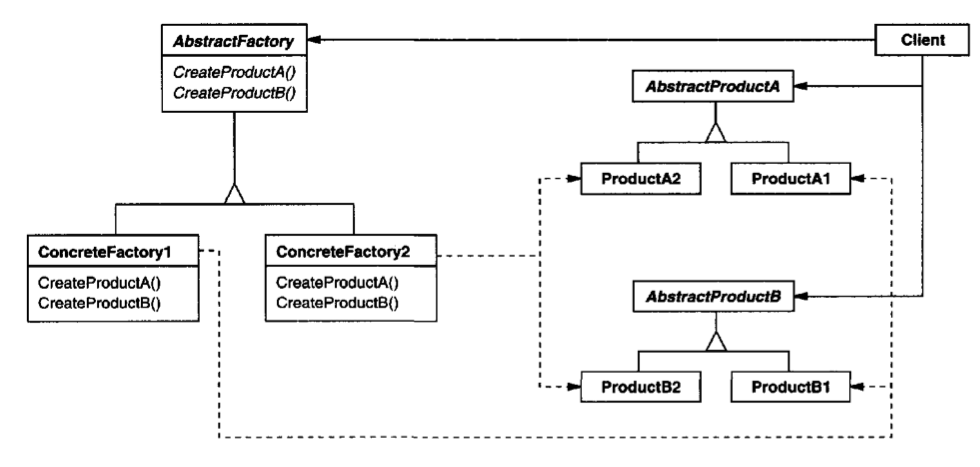

In [3]:
from abc import ABC, abstractmethod


class FoodType:
    french = 1
    american = 2

# Abstract product
class Restaurant(ABC):
    @abstractmethod
    def make_food(self):
        pass

    @abstractmethod
    def make_drink(self):
        pass

# Concrete product
class FrenchRestaurant(Restaurant):
    def make_food(self):
        print("Cordon bleu")

    def make_drink(self):
        print("Merlot")

# Concrete product
class AmericanRestaurant(Restaurant):
    def make_food(self):
        print("Hamburger")

    def make_drink(self):
        print("Coca cola")

# Abstract/Concrete factory
class RestaurantFactory:
    @staticmethod
    def suggest_restaurant(r_type: FoodType):
        if r_type == FoodType.french:
            return FrenchRestaurant()
        else:
            return AmericanRestaurant()

# Client
def dine_at(restaurant: Restaurant):
    print("For dinner we are having:")
    restaurant.make_food()
    restaurant.make_drink()


if __name__ == '__main__':
    suggestion1 = RestaurantFactory.suggest_restaurant(FoodType.french)
    suggestion2 = RestaurantFactory.suggest_restaurant(FoodType.american)

    dine_at(suggestion1)
    dine_at(suggestion2)


For dinner we are having:
Cordon bleu
Merlot
For dinner we are having:
Hamburger
Coca cola


### Singleton pattern

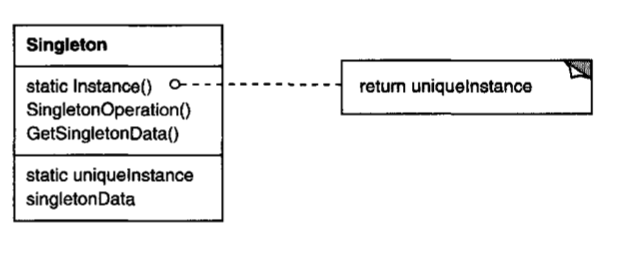

In [5]:
import time
from threading import Thread


class Singleton(type):
    _instances = {}
    
    def __call__(self, *args, **kwargs):
        """
        Default method overridden for instantiating
        """
        if self not in self._instances:
            instance = super().__call__(*args, **kwargs)
            time.sleep(1)
            self._instances[self] = instance
        return self._instances[self]
    
class NetworkDriver(metaclass=Singleton):
    
    def log(self):
        print(f"{self} \n")
        
def create_singleton():
    singleton = NetworkDriver()
    singleton.log()
    return singleton


if __name__ == '__main__':

    # s1 = create_singleton()
    # s1 = create_singleton()

      
    p1 = Thread(target=create_singleton)
    p2 = Thread(target=create_singleton)
    p1.start()
    p2.start()


    
    

In [1]:
import time
from threading import Thread, Lock


class Singleton(type):
    _instances = {}
    _lock = Lock()
    
    def __call__(self, *args, **kwargs):
        """
        Default method overridden for instantiating
        """
        with self._lock:
            if self not in self._instances:
                instance = super().__call__(*args, **kwargs)
                #time.sleep(1)
                self._instances[self] = instance
        return self._instances[self]
    
class NetworkDriver(metaclass=Singleton):
    
    def log(self):
        print(f"{self} \n")
        
def create_singleton():
    singleton = NetworkDriver()
    singleton.log()
    return singleton


if __name__ == '__main__':

    # s1 = create_singleton()
    # s1 = create_singleton()

      
    p1 = Thread(target=create_singleton)
    p2 = Thread(target=create_singleton)
    p1.start()
    p2.start()


    
    

### Factory Method

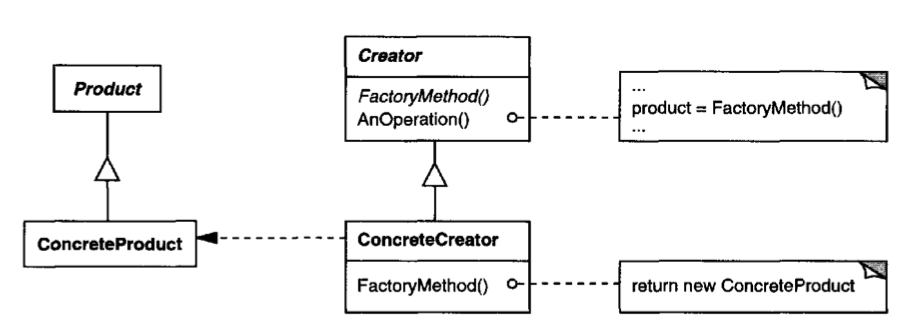

In [5]:
from abc import ABC, abstractmethod


class Country:
    pass


class USA(Country):
    pass


class Spain(Country):
    pass


class Japan(Country):
    pass

# Creator
class CurrencyFactory(ABC):
    @abstractmethod
    def currency_factory(self, country) -> str:
        pass

# Concrete creator
class FiatCurrencyFactory(CurrencyFactory):
    def currency_factory(self, country) -> str:
        if country is USA:
            return "USD"
        elif country is Spain:
            return "EUR"
        else:
            return "JPY"

# Concrete creator
class VirtualCurrencyFactory(CurrencyFactory):
    def currency_factory(self, country) -> str:
        if country is USA:
            return "Bitcoin"
        elif country is Spain:
            return "Ethereum"
        else:
            return "Dogecoin"


if __name__ == '__main__':
    f1 = FiatCurrencyFactory()
    f2 = VirtualCurrencyFactory()

    print(f1.currency_factory(USA))
    print(f1.currency_factory(Spain))
    print(f1.currency_factory(Japan))

    print(f2.currency_factory(USA))
    print(f2.currency_factory(Spain))
    print(f2.currency_factory(Japan))






USD
EUR
JPY
Bitcoin
Ethereum
Dogecoin


In [ ]:
from abc import ABC, abstractmethod

class 


### Builder

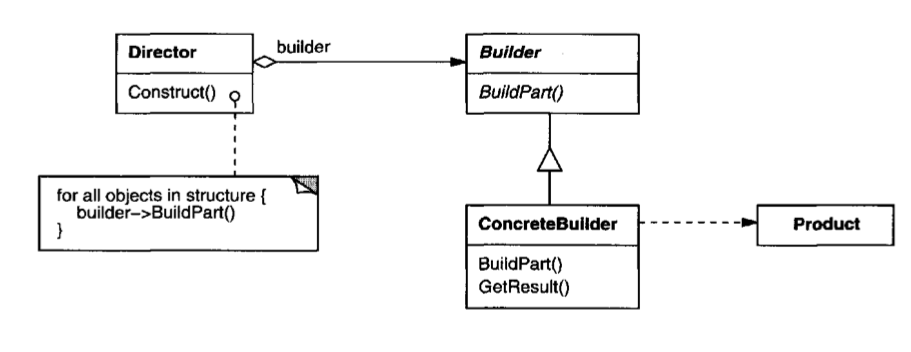

In [4]:
# Product to build 
# Represents the complex object under construction
# includes classes that define the constituent parts, including interfaces 
# for assembling the parts into the final result
class NetworkService:
    def __init__(self):
        self.components = {}

    def add(self, key: str, value: str):
        self.components[key] = value

    def show(self):
        print(self.components)

        
# Builder / Abstract builder
# Specifies an abstract interface for creating parts of a NetworkService object
class NetworkServiceBuilder:
    def __init__(self):
        self._service = NetworkService()

    def add_target_url(self, url: str):
        self._service.add("URL", url)

    def add_auth(self, auth: str):
        self._service.add("Authorization", auth)

    def add_caching(self, cache: int):
        self._service.add("Cache-Control", cache)

    def build(self) -> NetworkService:
        service = self._service
        self._service = NetworkService()
        return service


if __name__ == '__main__':
    
    # Diretor - construct the object using the builder interface
    builder = NetworkServiceBuilder()
    builder.add_target_url("google.com")
    service1 = builder.build()
    service1.show()

    builder.add_target_url("youtube.com")
    builder.add_auth("abc123")
    builder.add_caching(60000)

    service2 = builder.build()
    service2.show()




{'URL': 'google.com'}
{'URL': 'youtube.com', 'Authorization': 'abc123', 'Cache-Control': 60000}


In [4]:
class NetworkService:
    def __init__(self, url: str = "", auth: str = "", cache: int = 0):
        self.components = {}
        if url:
            self.components["URL"] = url
        if auth:
            self.components["Authorization"] = auth
        if cache:
            self.components["Cache-Control"] = cache

    def show(self):
        print(self.components)


if __name__ == '__main__':
    service1 = NetworkService(url="google.com")
    service1.show()

    service2 = NetworkService(url="youtube.com", auth="abc123", cache=60000)
    service2.show()

{'URL': 'google.com'}
{'URL': 'youtube.com', 'Authorization': 'abc123', 'Cache-Control': 60000}


### Prototype

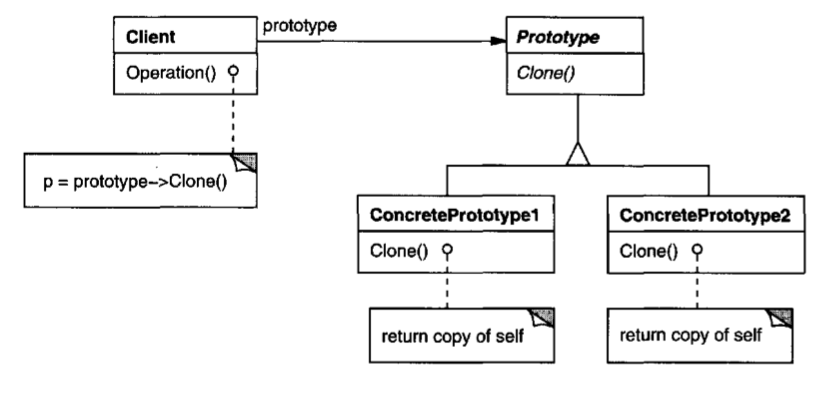

In [6]:
# The abstract and concrete classes do not create the cloning interfaces
# in this example. The standard copy feature in Python is used for cloing.
import copy
from abc import ABC, abstractmethod

# Abstract class to define shared method
class Shape(ABC):
    @abstractmethod
    def draw(self):
        pass

# Concrete class
class Square(Shape):
    def __init__(self, size):
        self.size = size

    def draw(self):
        print(f"Drawing a square of size {self.size}")

# Concrete class
class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def draw(self):
        print(f"Drawing a circle of radius {self.radius}")

# Client class to call cloned interface method
class AbstractArt:
    def __init__(self, bg_color, shapes):
        self.bg_color = bg_color
        self.shapes = shapes

    def draw(self):
        print(f"Background color is {self.bg_color}")
        [x.draw() for x in shapes]


if __name__ == '__main__':
    shapes = [Square(5), Square(3), Circle(8)]
    art1 = AbstractArt("red", shapes)

    # Using "copy" facility in python to clone
    art2 = copy.copy(art1)
    art1.draw()
    art2.draw()
    
    

Background color is red
Drawing a square of size 5
Drawing a square of size 3
Drawing a circle of radius 8
Background color is red
Drawing a square of size 5
Drawing a square of size 3
Drawing a circle of radius 8
